In [1]:
from mftool import Mftool
import pandas as pd
import time

In [2]:
#creating a mftool object
mf=Mftool()

In [3]:
#importing config file that has all config details
from src.config import scheme_config

In [4]:
#Get all felxi cap funds

flexi_MF=[]
all_scheme_codes=mf.get_scheme_codes()
all_scheme_codes
#for id in all_scheme_codes:
#   flexi_MF.append(all_scheme_codes['Scheme Code'])
#print(flexi_MF)

flexi_scheme_codes = [
    code for code, name in all_scheme_codes.items()
    if "flexi" in name.lower() and "direct" in name.lower() and "growth" in name.lower()
]
print(flexi_scheme_codes)

['151796', '120564', '141925', '151895', '118424', '148404', '150387', '118275', '119076', '140353', '118535', '118955', '152135', '120046', '148990', '149763', '151379', '120492', '120166', '120264', '149104', '151412', '129046', '143793', '149094', '151917', '133839', '122639', '120843', '149450', '119718', '144905', '150571', '144546', '118883', '152584', '153543', '119292', '120662', '150346', '148642', '119252']


In [5]:
flexi_funds = []
for scheme_code in flexi_scheme_codes:
    try:
        details = mf.get_scheme_details(scheme_code)
        nav_data = mf.get_scheme_quote(scheme_code)

        if details and nav_data:
            fund_info = {
                'Scheme Code': scheme_code,
                'Scheme Name': nav_data['scheme_name'],
                'Latest NAV': nav_data['nav'],
                'NAV Date': nav_data['last_updated'],
                'Fund Type': details['scheme_type'],
                'Fund Category': details['scheme_category'],
                'Fund House': details['fund_house'],
                'Launch Date': details['scheme_start_date'],
                'Benchmark': 'Nifty 500 TRI'  # Optional placeholder
            }

            flexi_funds.append(fund_info)

    except Exception as e:
        print(f"⚠️ Error for {scheme_code}: {e}")

# Step 4: Convert to DataFrame and save
df_info = pd.DataFrame(flexi_funds)
df_info.head()

,Scheme Code,Scheme Name,Latest NAV,NAV Date,Fund Type,Fund Category,Fund House,Launch Date,Benchmark
0,151796,360 ONE FLEXICAP FUND-DIRECT PLAN- GROWTH,15.5301,30-Jul-2025,Open Ended Schemes,Equity Scheme - Flexi Cap Fund,360 ONE Mutual Fund,"{'date': '06-07-2023', 'nav': '10.04820'}",Nifty 500 TRI
1,120564,Aditya Birla Sun Life Flexi Cap Fund - Growth ...,1988.31,30-Jul-2025,Open Ended Schemes,Equity Scheme - Flexi Cap Fund,Aditya Birla Sun Life Mutual Fund,"{'date': '02-01-2013', 'nav': '280.57000'}",Nifty 500 TRI
2,141925,Axis Flexi Cap Fund - Direct Plan - Growth,29.62,30-Jul-2025,Open Ended Schemes,Equity Scheme - Flexi Cap Fund,Axis Mutual Fund,"{'date': '24-11-2017', 'nav': '10.01000'}",Nifty 500 TRI
3,151895,Bajaj Finserv Flexi Cap Fund-Direct Plan-Growth,15.007,30-Jul-2025,Open Ended Schemes,Equity Scheme - Flexi Cap Fund,Bajaj Finserv Mutual Fund,"{'date': '16-08-2023', 'nav': '10.01700'}",Nifty 500 TRI
4,118424,BANDHAN Flexi Cap Fund-Direct Plan-Growth,227.439,30-Jul-2025,Open Ended Schemes,Equity Scheme - Flexi Cap Fund,Bandhan Mutual Fund,"{'date': '02-01-2013', 'nav': '40.62120'}",Nifty 500 TRI


In [7]:
from src.data_loader import get_nav_data
fund_code = "PPFCF"
nav_csv_path = scheme_config[fund_code]["nav_csv_path"]
nav_csv_path

NAV_df = get_nav_data(nav_csv_path)
NAV_df.head()

,NAV,Nifty500_TRI,scheme_code
DateTime,,,
2013-05-28,10.00,6623.80,122639
2013-05-29,10.01,6609.41,122639
2013-05-30,10.03,6625.94,122639
2013-05-31,10.01,6502.47,122639
2013-06-03,10.06,6471.69,122639


In [6]:
nav_df.columns

Index(['NAV', 'Nifty500_TRI', 'scheme_code'], dtype='object')

In [8]:
#normalizing fund returns and index returns to get alpha and beta
NAV_df['NAV_normalized']=NAV_df['NAV'] / NAV_df['NAV'].iloc[0]*10
NAV_df['Nft500_TRI_normalized']=NAV_df['Nifty500_TRI']/NAV_df['Nifty500_TRI'].iloc[0]*10
NAV_df['fund_return'] = NAV_df['NAV_normalized'].pct_change(fill_method=None)
NAV_df['index_return'] = NAV_df['Nft500_TRI_normalized'].pct_change(fill_method=None)

NAV_df['fund_return'] = NAV_df['fund_return'].fillna(0)
NAV_df['index_return'] = NAV_df['index_return'].fillna(0)
NAV_df

,NAV,Nifty500_TRI,scheme_code,NAV_normalized,Nft500_TRI_normalized,fund_return,index_return
DateTime,,,,,,,
2013-05-28,10.00,6623.80,122639,10.00,10.000000,0.000000,0.000000
2013-05-29,10.01,6609.41,122639,10.01,9.978275,0.001000,-0.002172
2013-05-30,10.03,6625.94,122639,10.03,10.003231,0.001998,0.002501
2013-05-31,10.01,6502.47,122639,10.01,9.816827,-0.001994,-0.018634
2013-06-03,10.06,6471.69,122639,10.06,9.770358,0.004995,-0.004734
...,...,...,...,...,...,...,...
2025-07-14,84.72,37047.20,122639,84.72,55.930433,0.002248,0.001140
2025-07-15,84.81,37270.09,122639,84.81,56.266931,0.001062,0.006016
2025-07-16,84.80,37309.40,122639,84.80,56.326278,-0.000118,0.001055


In [9]:
# Calculating rolling beta

#In Indian financial modeling, the 10-year government bond yield is commonly used as the risk-free rate, and as of mid-2025:
#India 10-Year G-Sec yield ≈ 6.8% – 7.0%

annual_rf = 0.068
daily_rf = (1 + annual_rf)**(1/252) - 1
NAV_df['excess_fund']=NAV_df['fund_return']-daily_rf
NAV_df['excess_index']=NAV_df['index_return']-daily_rf
window=30
rolling_cov=NAV_df['excess_fund'].rolling(window).cov(NAV_df['excess_index'])
rolling_var=NAV_df['excess_index'].rolling(window).var()
NAV_df['Rolling_beta']=rolling_cov/rolling_var
NAV_df['Rolling_beta'].nunique

<bound method IndexOpsMixin.nunique of DateTime
2013-05-28         NaN
2013-05-29         NaN
2013-05-30         NaN
2013-05-31         NaN
2013-06-03         NaN
                ...   
2025-07-14    0.716190
2025-07-15    0.683616
2025-07-16    0.678660
2025-07-17    0.678793
2025-07-18    0.617059
Name: Rolling_beta, Length: 2989, dtype: float64>

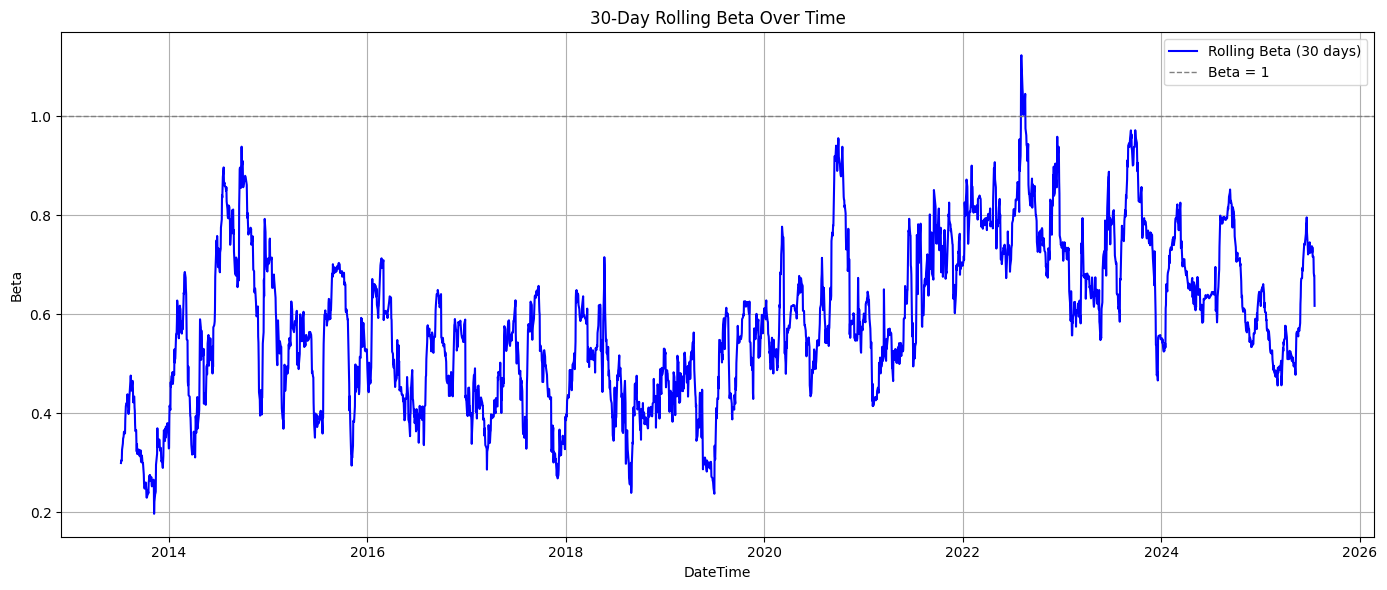

In [10]:
# DateTime here is your index, so making it a column
NAV_df.reset_index(inplace=True)
# sometimes if we take data from csv, it may have speciaL characters, thus better to strip column names

NAV_df.columns = NAV_df.columns.str.strip()
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(NAV_df['DateTime'], NAV_df['Rolling_beta'], label='Rolling Beta (30 days)', color='blue')

plt.title('30-Day Rolling Beta Over Time')
plt.xlabel('DateTime')
plt.ylabel('Beta')
plt.grid(True)
plt.axhline(1, color='gray', linestyle='--', linewidth=1, label='Beta = 1')
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
#In Indian financial modeling, the 10-year government bond yield is commonly used as the risk-free rate, and as of mid-2025:
#India 10-Year G-Sec yield ≈ 6.8% – 7.0%

annual_rf = 0.068
daily_rf = (1 + annual_rf)**(1/252) - 1
cov=(NAV_df['fund_return']-daily_rf).cov(NAV_df['index_return']-daily_rf)
var=(NAV_df['index_return']-daily_rf).var()
all_time_beta=cov/var
print(all_time_beta)

0.5920085968947569


In [ ]:
#### ROLLING ALPHA 

#In Indian financial modeling, the 10-year government bond yield is commonly used as the risk-free rate, and as of mid-2025:
#India 10-Year G-Sec yield ≈ 6.8% – 7.0%

rf_annual = 0.068  # 6.8%

# If we consider simple interest return then ...for 1 yr(252 trading days) 0.068  then for 1 day = 0.068/252
# But considering compound interest is more appropriate for accurate results, hence..
# (1+0.068)-> to make it a multiplier, to the power 1/252, and then subtracting back 1

rf_daily = (1 + rf_annual) ** (1 / 252) - 1

# Calculate rolling mean returns (daily)
fund_mean = NAV_df_PPFCF['fund_return'].rolling(window).mean()
index_mean = NAV_df_PPFCF['index_return'].rolling(window).mean()

# Get existing rolling beta (already calculated)
rolling_beta = NAV_df_PPFCF['Rolling_beta']

# Calculate expected return using CAPM
expected_return = rf_daily + rolling_beta * (index_mean - rf_daily)

# Alpha = fund return - expected return
rolling_alpha_daily = fund_mean - expected_return

# Annualize alpha
NAV_df_PPFCF['Rolling_alpha'] = rolling_alpha_daily * 252

NAV_df_PPFCF


In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(NAV_df_PPFCF['DateTime'], NAV_df_PPFCF['Rolling_alpha'], label='Rolling Alpha (30 days)', color='blue')

plt.title('30-Day Rolling Alpha Over Time')
plt.xlabel('DateTime')
plt.ylabel('Alpha')
plt.grid(True)
plt.axhline(1, color='gray', linestyle='--', linewidth=1, label='BAlphaeta = 1')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
fund_mean = NAV_df_PPFCF['fund_return'].mean()
index_mean = NAV_df_PPFCF['index_return'].mean()

# Get existing rolling beta (already calculated)
beta = 0.592
rf_daily = (1 + rf_annual) ** (1 / 252) - 1


exp_return = rf_daily + beta * (index_mean - rf_daily)

# Alpha = fund return - expected return
alpha_daily = fund_mean - exp_return

all_time_alpha=alpha_daily*252*100
all_time_alpha

In [ ]:
plt.figure(figsize=(14, 6))

# Plot fund normalized NAV
plt.plot(NAV_df_PPFCF['DateTime'], NAV_df_PPFCF['NAV_normalized'], label='Fund NAV (Normalized)', color='green')

# Plot index normalized NAV
plt.plot(NAV_df_PPFCF['DateTime'], NAV_df_PPFCF['Nft500_TRI_normalized'], label='Nifty 500 TRI (Normalized)', color='blue')

# Chart settings
plt.title('Growth of ₹10 Over Time: Fund vs Index')
plt.xlabel('Date')
plt.ylabel('Normalized NAV (Base = 10)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Export NAV data
NAV_df_PPFCF.to_csv("NAV_df_PPFCF.csv", index=False)

# Export fund info/metadata
df_info.to_csv("flexi_capF_info.csv", index=False)

In [ ]:
import requests
from bs4 import BeautifulSoup
import re

url = "https://groww.in/mutual-funds/parag-parikh-long-term-value-fund-direct-growth"
headers = {
    "User-Agent": "Mozilla/5.0 (compatible; ExpenseScraper/1.0)"
}

response = requests.get(url, headers=headers)
response.raise_for_status()

soup = BeautifulSoup(response.text, "html.parser")

# Try to find the element that shows "Expense ratio"
text = soup.get_text(separator=" ")

# Regex to find a percentage that follows "Expense ratio"
match = re.search(r'Expense ratio\s*[:\-]?\s*([\d.]+%)', text, re.IGNORECASE)

if match:
    expense_ratio = match.group(1)
    print("Expense Ratio:", expense_ratio)
else:
    print("Expense ratio not found in page text.")


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re


# Scrape expense ratio
url = "https://groww.in/mutual-funds/parag-parikh-long-term-value-fund-direct-growth"
headers = {
    "User-Agent": "Mozilla/5.0 (compatible; ExpenseScraper/1.0)"
}

response = requests.get(url, headers=headers)
response.raise_for_status()

soup = BeautifulSoup(response.text, "html.parser")
text = soup.get_text(separator=" ")

# Extract expense ratio using regex
match = re.search(r'Expense ratio\s*[:\-]?\s*([\d.]+%)', text, re.IGNORECASE)

if match:
    expense_ratio = match.group(1)

    # Create summary DataFrame
    summary_df = pd.DataFrame({
        'scheme_code': ['122639'],
        'alpha_all_time': [all_time_alpha],
        'beta_all_time': [all_time_beta],
        'expense_ratio': [expense_ratio]
    })

    print(summary_df)
else:
    print("Expense ratio not found in page text.")


In [ ]:
# export to csv
summary_df.to_csv("summary_PPFCF_df.csv", index=False)